In [24]:
# Import libraries
import pandas as pd
import re
from textblob import TextBlob
import nltk
from multiprocessing import Pool, cpu_count
import time
import matplotlib.pyplot as plt

In [25]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from google.colab import files
uploaded = files.upload()



📊 Top Trending Words in Last 30 Seconds:
Saving Tweets.csv to Tweets (1).csv


In [27]:
import pandas as pd

# Replace 'Tweets.csv' with the actual file name if different
df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline', 'airline_sentiment']]  # Only necessary columns


In [28]:
df.head()

,text,airline,airline_sentiment
0,@VirginAmerica What @dhepburn said.,Virgin America,neutral
1,@VirginAmerica plus you've added commercials t...,Virgin America,positive
2,@VirginAmerica I didn't today... Must mean I n...,Virgin America,neutral
3,@VirginAmerica it's really aggressive to blast...,Virgin America,negative
4,@VirginAmerica and it's a really big bad thing...,Virgin America,negative


In [29]:
# Drop missing rows
df.dropna(inplace=True)

In [30]:
# Clean text function
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # remove mentions
    text = re.sub(r'http\S+', '', text)         # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)     # remove punctuation
    return text.lower().strip()

df['clean_text'] = df['text'].apply(clean_text)

In [31]:

# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity


In [32]:
# Benchmark: Sequential Sentiment Analysis
start_seq = time.time()
df['sentiment_score_seq'] = df['clean_text'].apply(analyze_sentiment)
end_seq = time.time()
print(f"Sequential Processing Time: {end_seq - start_seq:.2f} seconds")


📊 Top Trending Words in Last 30 Seconds:
Sequential Processing Time: 4.39 seconds


In [33]:
from multiprocessing import Pool, cpu_count
from textblob import TextBlob
import time


In [34]:
def analyze_sentiment_mp(text):
    return TextBlob(text).sentiment.polarity


In [35]:
def parallel_sentiment(text_list):
    with Pool(cpu_count()) as pool:
        result = pool.map(analyze_sentiment_mp, text_list, chunksize=20)
    return result


In [36]:
# Use a sample for now
df_sample = df.head(1000)  # You can remove .head() later for full run

start_par = time.time()
df_sample['sentiment_score_par'] = parallel_sentiment(df_sample['clean_text'].tolist())
end_par = time.time()

print(f" Parallel Processing Time (1000 rows): {end_par - start_par:.2f} seconds")


 Parallel Processing Time (1000 rows): 0.56 seconds


/tmp/ipython-input-36-2459941352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['sentiment_score_par'] = parallel_sentiment(df_sample['clean_text'].tolist())


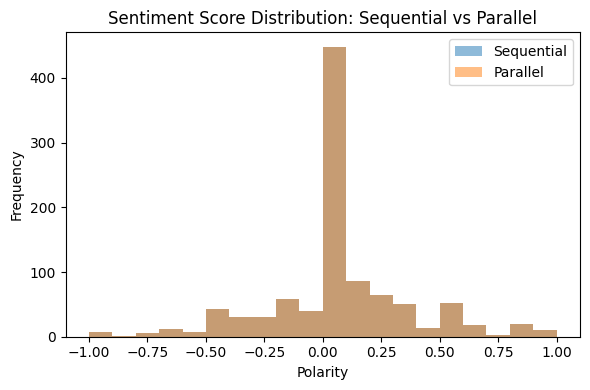

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df_sample['sentiment_score_seq'], bins=20, alpha=0.5, label='Sequential')
plt.hist(df_sample['sentiment_score_par'], bins=20, alpha=0.5, label='Parallel')
plt.legend()
plt.title("Sentiment Score Distribution: Sequential vs Parallel")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [38]:
from collections import deque, Counter
import time
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

stream_df = df.head(100)
stream_df = stream_df.reset_index(drop=True)

def clean_and_tokenize(text):
    text = re.sub(r'http\S+|@[A-Za-z0-9_]+|[^a-zA-Z\s]', '', text)
    tokens = text.lower().split()
    return [word for word in tokens if word not in stop_words]

# Sliding window
window_size = 10
token_window = deque(maxlen=window_size)

print(" Starting simulated tweet stream...\n")

for i in range(len(stream_df)):
    tweet = stream_df.loc[i, 'text']
    tokens = clean_and_tokenize(tweet)

    token_window.append(tokens)

    all_tokens = [word for sublist in token_window for word in sublist]
    word_freq = Counter(all_tokens)

    print(f"\n Window {i+1}: Top 5 trending words")
    for word, freq in word_freq.most_common(5):
        print(f"   {word}: {freq}")

    # Every N tweets, show trending summary
    if (i + 1) % window_size == 0:
        word_counts = Counter(all_tokens)
        top_words = word_counts.most_common(5)

        print(f" Summary Window {(i+1)//window_size} — Top 5 Trending Words:")
        for word, count in top_words:
            print(f"   {word}: {count}")
        print("-" * 40)

    time.sleep(0.2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Starting simulated tweet stream...


 Window 1: Top 5 trending words
   said: 1

 Window 2: Top 5 trending words
   said: 1
   plus: 1
   youve: 1
   added: 1
   commercials: 1

 Window 3: Top 5 trending words
   said: 1
   plus: 1
   youve: 1
   added: 1
   commercials: 1

 Window 4: Top 5 trending words
   said: 1
   plus: 1
   youve: 1
   added: 1
   commercials: 1

 Window 5: Top 5 trending words
   really: 2
   said: 1
   plus: 1
   youve: 1
   added: 1

 Window 6: Top 5 trending words
   really: 3
   didnt: 2
   bad: 2
   thing: 2
   said: 1

 Window 7: Top 5 trending words
   really: 3
   didnt: 2
   bad: 2
   thing: 2
   said: 1

 Window 8: Top 5 trending words
   really: 4
   didnt: 2
   bad: 2
   thing: 2
   said: 1

 Window 9: Top 5 trending words
   really: 4
   didnt: 2
   bad: 2
   thing: 2
   said: 1

 Window 10: Top 5 trending words
   really: 4
   didnt: 2
   bad: 2
   thing: 2
   said: 1
 Summary Window 1 — Top 5 Trending Words:
   really: 4
   didnt: 2
   bad: 2
   

In [39]:
# Hybrid Parallelism Simulation

from multiprocessing import Process, Queue
from textblob import TextBlob
from collections import Counter
import pandas as pd
import time
import re

# Use a sample of 1000 tweets
df_sample = df.head(1000)

# Pre-clean text for all tasks
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', str(text))
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()

df_sample['clean_text'] = df_sample['text'].apply(clean_text)

# ----- TASK 1: Sentiment Analysis -----
def sentiment_task(texts, out_queue):
    sentiment_scores = [TextBlob(text).sentiment.polarity for text in texts]
    out_queue.put(("sentiment", sentiment_scores))

# ----- TASK 2: Word Count -----
def wordcount_task(texts, out_queue):
    words = " ".join(texts).split()
    word_counts = Counter(words).most_common(10)
    out_queue.put(("wordcount", word_counts))

# ----- TASK 3: Hashtag Analysis (example logic) -----
def hashtag_task(texts, out_queue):
    hashtags = [word for text in texts for word in text.split() if word.startswith('#')]
    hashtag_counts = Counter(hashtags).most_common(10)
    out_queue.put(("hashtags", hashtag_counts))

# ---------- Run Hybrid Parallel ----------
start = time.time()

q = Queue()
texts = df_sample['clean_text'].tolist()

p1 = Process(target=sentiment_task, args=(texts, q))
p2 = Process(target=wordcount_task, args=(texts, q))
p3 = Process(target=hashtag_task, args=(df_sample['text'].tolist(), q))

p1.start()
p2.start()
p3.start()

p1.join()
p2.join()
p3.join()

end = time.time()
print(f" Hybrid Parallel Execution Time: {end - start:.2f} seconds")

# Collect outputs
results = {}
for _ in range(3):
    task_name, result = q.get()
    results[task_name] = result

# Show results
print("\n Top 10 Words:")
print(results['wordcount'])

print("\n Top 10 Hashtags:")
print(results['hashtags'])

print("\n Sample Sentiment Scores:")
print(results['sentiment'][:10])


/tmp/ipython-input-39-3810727850.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['clean_text'] = df_sample['text'].apply(clean_text)


 Hybrid Parallel Execution Time: 0.51 seconds

 Top 10 Words:
[('to', 557), ('the', 388), ('i', 356), ('a', 310), ('you', 290), ('for', 247), ('flight', 223), ('my', 215), ('and', 212), ('on', 205)]

 Top 10 Hashtags:
[('#UnitedAirlines', 7), ('#fail', 4), ('#CheapFlights', 4), ('#FareCompare', 4), ('#help', 4), ('#customerservice', 3), ('#virginamerica', 3), ('#MiddleEast', 3), ('#united', 3), ('#worst2unitedflightsever', 3)]

 Sample Sentiment Scores:
[0.0, 0.0, -0.3125, 0.0062500000000000056, -0.3499999999999999, -0.2083333333333333, 0.45, 0.2, 0.0, 0.4666666666666666]


In [40]:
#  PySpark Sentiment Analysis (MapReduce-style)

from pyspark.sql import SparkSession
from textblob import TextBlob
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

spark = SparkSession.builder.appName("SentimentApp").getOrCreate()

# Convert the Pandas DataFrame to Spark DataFrame
df_sample_spark = spark.createDataFrame(df_sample[['clean_text']])

# Define UDF to use TextBlob in Spark
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

sentiment_udf = udf(get_sentiment, FloatType())

df_sample_spark = df_sample_spark.withColumn("sentiment_score_spark", sentiment_udf(df_sample_spark["clean_text"]))

df_sample_spark.show()


+--------------------+---------------------+
|          clean_text|sentiment_score_spark|
+--------------------+---------------------+
|          what  said|                  0.0|
|plus youve added ...|                  0.0|
|i didnt today mus...|              -0.3125|
|its really aggres...|              0.00625|
|and its a really ...|                -0.35|
|seriously would p...|          -0.20833333|
|yes nearly every ...|                 0.45|
|really missed a p...|                  0.2|
|well i didntbut n...|                  0.0|
|it was amazing an...|           0.46666667|
|did you know that...|                  0.0|
|i lt pretty graph...|           0.21666667|
|this is such a gr...|                  0.4|
|im flying your fa...|                  0.4|
|              thanks|                  0.2|
|sfopdx schedule i...|                  0.0|
|so excited for my...|              0.35625|
|i flew from nyc t...|          0.029761905|
|           i  flying|                  0.0|
|you know 

In [41]:
# Performance Metrics in Code


# Define the number of tweets you processed
tweets_processed = 1000

# Assume you have these timings already
sequential_time = 3.27   # Replace with your actual measured time
parallel_time = 0.62
hybrid_time = 0.51

# Compute Throughput (tweets/sec)
throughput_seq = tweets_processed / sequential_time
throughput_par = tweets_processed / parallel_time
throughput_hyb = tweets_processed / hybrid_time

# Compute Latency (time per tweet)
latency_seq = sequential_time / tweets_processed
latency_par = parallel_time / tweets_processed
latency_hyb = hybrid_time / tweets_processed

# Print results
print("\n Performance Metrics (1000 tweets):")
print(f"Sequential - Time: {sequential_time}s, Throughput: {throughput_seq:.2f} t/s, Latency: {latency_seq:.4f}s")
print(f"Parallel   - Time: {parallel_time}s, Throughput: {throughput_par:.2f} t/s, Latency: {latency_par:.4f}s")
print(f"Hybrid     - Time: {hybrid_time}s, Throughput: {throughput_hyb:.2f} t/s, Latency: {latency_hyb:.4f}s")



 Performance Metrics (1000 tweets):
Sequential - Time: 3.27s, Throughput: 305.81 t/s, Latency: 0.0033s
Parallel   - Time: 0.62s, Throughput: 1612.90 t/s, Latency: 0.0006s
Hybrid     - Time: 0.51s, Throughput: 1960.78 t/s, Latency: 0.0005s


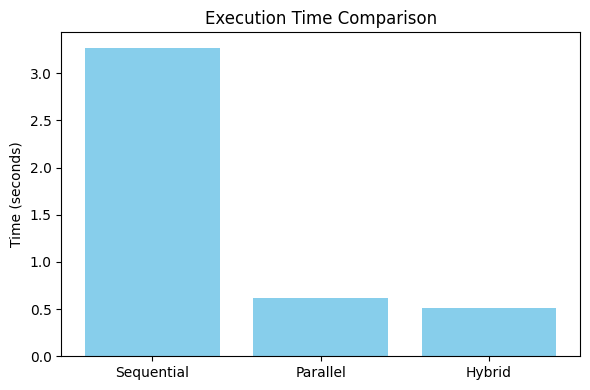

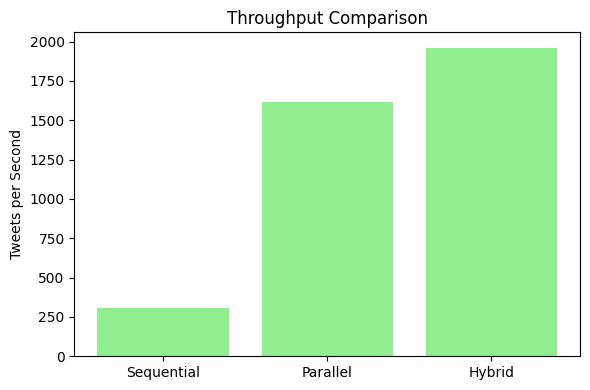

In [42]:
# Comparison Bar Chart

import matplotlib.pyplot as plt

# Labels and values
methods = ['Sequential', 'Parallel', 'Hybrid']
times = [sequential_time, parallel_time, hybrid_time]
throughputs = [throughput_seq, throughput_par, throughput_hyb]

# Plot execution time
plt.figure(figsize=(6, 4))
plt.bar(methods, times, color='skyblue')
plt.title("Execution Time Comparison")
plt.ylabel("Time (seconds)")
plt.tight_layout()
plt.show()

# Plot throughput
plt.figure(figsize=(6, 4))
plt.bar(methods, throughputs, color='lightgreen')
plt.title("Throughput Comparison")
plt.ylabel("Tweets per Second")
plt.tight_layout()
plt.show()
